## 3. 实验记录

In [1]:
%run Experiment-exploration-ALL.init.ipynb


Import modules successfully

Create:
idpart:{} 
 record_data:{'tool.word': {}, 'useStopwords': {}, 'classifier': {}, 'micro-F1': {}, 'time.format.train': {}, 'time.format.evaluate': {}, 'time.format.all': {}, 'time.raw.train': {}, 'time.raw.evaluate': {}, 'time.raw.all': {}}
 record_labels:['tool.word', 'useStopwords', 'classifier', 'micro-F1', 'time.format.train', 'time.format.evaluate', 'time.format.all', 'time.raw.train', 'time.raw.evaluate', 'time.raw.all']

Data structure for recording experiment data created.

Pick random folders from source successfully


In [2]:
vecsize=1000

### 3.2 Word2Vec 表示(gensim + corpus)-无停用词

In [3]:
# idpart['model.word'] = 'Word2Vec'
idpart['useStopwords'] = 'NO'
idpart['tool.word'] = 'gensim'
phase = 'init'

%run Experiment-exploration-Word2Vec.gensim.ipynb

##### A. 建立词模型

In [4]:
timev = {i:0.0 for i in ['h', 'min', 'sec', 'ms', 'us']}

In [5]:
paths

{'dir.TensorFlow.corpus': '/home/sushangjun/git/capstone.now/proposal/new/notebooks/../data/../models/TensorFlow.corpus',
 'dir.dataroot': '/home/sushangjun/git/capstone.now/proposal/new/notebooks/../data',
 'dir.gensim.corpus': '/home/sushangjun/git/capstone.now/proposal/new/notebooks/../data/../models/gensim.corpus',
 'dir.modelroot': '/home/sushangjun/git/capstone.now/proposal/new/notebooks/../data/../models',
 'dir.test': '/home/sushangjun/git/capstone.now/proposal/new/notebooks/../data/trialdata/test',
 'dir.train': '/home/sushangjun/git/capstone.now/proposal/new/notebooks/../data/trialdata/train'}

In [6]:
%%capture --no-display timevStr
%%time

# phase = 'modeling.word'
# %run Experiment-exploration-Word2Vec.gensim.ipynb

calander = datetime.date.today().timetuple()
modelpath = os.path.join(
    paths['dir.{}.{}'.format(idpart['tool.word'], 'corpus')],
    '{}.{}{}{}'.format(idpart['tool.word'], '2017', '6', '19')#calander.tm_year, calander.tm_mon, calander.tm_mday)
)
model = gensim.models.word2vec.Word2Vec.load(modelpath)

In [7]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    timev[i] += timeDict[i]

{'h': 0, 'min': 0, 'sec': 6.98, 'ms': 0, 'us': 0}
Record time successfully.


In [8]:
wordtime = copy.copy(timev)

##### B. 建立文档模型

###### 3.2.1 文档的词向量均值表示(Arithmetic Mean)

In [9]:
timev = copy.copy(wordtime)

In [10]:
%%capture --no-display timevStr
%%time

# idpart['model.document'] = 'ArithmeticMean'

phase = 'modeling.document'
%run Experiment-exploration-Word2Vec.gensim.ipynb

,class,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,rec.sport.baseball,0.069279,0.053071,0.120064,0.018599,0.175370,-0.191376,-0.034934,-0.040023,-0.018194,...,0.114175,0.013333,0.085615,0.054617,0.049650,-0.110798,0.029855,0.126272,0.040174,0.035510
1,soc.religion.christian,0.095840,0.062523,0.132901,0.020598,0.198523,-0.209031,-0.006851,-0.042393,-0.002715,...,0.153506,0.044099,0.055328,0.017443,0.074451,-0.095562,0.074946,0.119497,0.060835,0.008442
2,soc.religion.christian,0.045827,0.074844,0.074549,0.011011,0.207198,-0.218471,0.004316,-0.068912,-0.008988,...,0.103181,0.036657,0.051092,0.022728,0.094424,-0.068683,0.075175,0.104691,0.058462,0.043937
3,talk.politics.misc,0.028951,-0.073699,0.079730,0.022333,0.116434,-0.100653,-0.015404,-0.056370,-0.040481,...,0.072368,0.014119,0.077049,0.121413,0.061861,-0.096097,0.088257,0.092315,0.017457,0.024312
4,comp.windows.x,0.103217,-0.034756,0.036869,-0.029207,0.128531,-0.150223,-0.056205,-0.024588,-0.093461,...,0.102324,0.056546,-0.001241,0.021637,0.062427,-0.108483,0.008360,0.072358,0.033344,0.036470
5,rec.autos,0.080579,-0.000541,0.053936,0.044465,0.158461,-0.216190,-0.031460,-0.059334,-0.049918,...,0.141872,0.044908,0.061894,0.070249,0.065177,-0.105723,0.033602,0.098566,0.049547,0.002752
6,rec.autos,0.069908,0.023901,0.105738,-0.023105,0.127465,-0.148969,-0.066703,-0.058137,-0.041165,...,0.135535,0.048867,0.058806,0.053554,0.091956,-0.069734,0.042825,0.102432,0.050782,0.030690
7,rec.sport.hockey,0.093037,0.033538,0.088335,0.040827,0.187043,-0.172516,0.006468,-0.031109,-0.050199,...,0.135966,0.054306,0.077692,0.026389,0.064380,-0.083062,0.087679,0.098582,0.035327,0.049834
8,rec.motorcycles,0.127016,0.048419,0.099279,-0.008650,0.152388,-0.196155,-0.046757,-0.037560,-0.020350,...,0.088213,-0.009033,0.068301,0.114537,0.071633,-0.082953,0.073609,0.137820,-0.002130,-0.020424
9,talk.politics.mideast,0.053594,0.029608,0.091280,0.032178,0.147062,-0.188820,-0.085399,-0.079659,-0.053416,...,0.126111,0.068039,0.045646,0.099952,0.027607,-0.134338,0.106648,0.124915,0.049201,0.024007


,class,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,soc.religion.christian,0.026026,0.066215,0.079019,-0.015323,0.144279,-0.162984,-0.048869,-0.044896,-0.039204,...,0.118518,0.046861,0.064341,0.037894,0.079057,-0.089786,0.063123,0.080031,0.080002,0.018113
1,misc.forsale,0.108476,0.027349,0.061731,-0.006945,0.116164,-0.183410,-0.025019,-0.061366,-0.017934,...,0.130858,0.047641,0.088180,0.081312,0.046421,-0.072474,0.053223,0.093206,0.053271,0.015811
2,sci.med,0.094243,0.026508,0.092694,-0.024295,0.053936,-0.139563,-0.046430,-0.051169,-0.065148,...,0.118804,0.050722,0.039677,0.016281,0.080799,-0.070022,0.063466,0.113032,0.034908,0.011714
3,sci.electronics,0.072356,-0.020040,0.051638,-0.016923,0.098195,-0.122740,-0.082486,-0.033642,-0.025515,...,0.103566,0.007405,0.051739,0.117883,0.053720,-0.109828,0.027191,0.149733,-0.009738,-0.027256
4,comp.sys.mac.hardware,0.122758,-0.048512,0.049655,-0.005465,0.064289,-0.140549,-0.038757,-0.045358,-0.002794,...,0.079144,-0.030741,0.070093,0.131296,0.077255,-0.097304,0.019551,0.165500,0.015641,-0.010413
5,sci.electronics,0.092039,0.007722,0.096691,-0.058002,0.113010,-0.187740,-0.003383,-0.042080,-0.032368,...,0.097672,0.075278,0.073968,0.095289,0.082781,-0.056712,0.061505,0.065875,0.000755,-0.017576
6,rec.sport.hockey,0.078845,0.045109,0.097404,0.042891,0.190603,-0.238159,0.001996,-0.063697,-0.050618,...,0.173159,0.058429,0.097445,0.051705,0.085020,-0.099798,0.067665,0.115190,0.063342,0.048243
7,talk.religion.misc,0.049837,0.025694,0.044367,0.000557,0.073631,-0.161723,-0.042457,-0.064085,0.004809,...,0.088194,-0.026292,0.043454,0.117105,0.061448,-0.118995,0.050058,0.150890,0.009092,-0.041957
8,talk.religion.misc,0.024222,0.034453,0.093396,-0.034241,0.113331,-0.185825,-0.057892,-0.037239,-0.027275,...,0.108445,0.000114,0.029876,0.121395,0.055322,-0.101530,0.014134,0.143635,-0.003407,-0.011480
9,comp.os.ms-windows.misc,0.068405,0.041615,0.070210,-0.009614,0.148749,-0.203000,-0.018168,-0.044545,-0.031921,...,0.111282,0.059149,0.079126,0.046429,0.060604,-0.071080,0.040874,0.101890,0.069031,0.036798


In [11]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    timev[i] += timeDict[i]

{'h': 0, 'min': 0, 'sec': 36.2, 'ms': 0, 'us': 0}
Record time successfully.


###### 3.2.2 文档的「概念袋」（Bag-of-Concepts）表示(Bag-of-Concepts)

###### 3.2.3 文档的「概念袋」（Bag-of-Concepts）+TFIDF 表示(Bag-of-Concepts with 'TF-IDF')

##### C. 训练与评估

##### C.1 SVM classifier(gensim+corpus)

###### C.1.0 Save record_data

In [12]:
idpart['classifier'] = 'SVM'

phase = 'save_before_train'
%run Experiment-exploration-share.ipynb

###### C.1.1 Train

In [13]:
%%capture --no-display timevStr
%%time

from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)

In [14]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    record_data['time.raw.train'][ID][i] = timeDict[i]

{'h': 0, 'min': 0, 'sec': 16.5, 'ms': 0, 'us': 0}
Record time successfully.


###### C.1.2 Evaluate

In [15]:
%%capture --no-display timevStr
%%time

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_test_pred = clf.predict(X_test)
# record_data['accuracy'][ID] = accuracy_score(y_test_true, y_test_pred)
# record_data['macro-F1'][ID] = f1_score(y_test_true, y_test_pred, average='macro')
record_data['micro-F1'][ID] = f1_score(y_test_true, y_test_pred, average='micro')

In [16]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    record_data['time.raw.evaluate'][ID][i] = timeDict[i]

{'h': 0, 'min': 0, 'sec': 0, 'ms': 139.0, 'us': 0}
Record time successfully.


In [17]:
phase = 'post-display'
%run Experiment-exploration-share.ipynb

,tool.word,useStopwords,classifier,micro-F1,time.format.train,time.format.evaluate,time.format.all
0,gensim,NO,SVM,0.823553,0:00:16.500000,0:00:00.139000,0:00:16.639000


##### C.2 sklearn-NN classifier(gensim+corpus)

###### C.2.0 Save record_data

In [18]:
idpart['classifier'] = 'sk-NN'

phase = 'save_before_train'
%run Experiment-exploration-share.ipynb

###### C.2.1 Train

In [19]:
%%capture --no-display timevStr
%%time

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(512,))
clf.fit(X_train, y_train)

In [20]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    record_data['time.raw.train'][ID][i] = timeDict[i]

{'h': 0, 'min': 1.0, 'sec': 22.0, 'ms': 0, 'us': 0}
Record time successfully.


###### C.2.2 Evaluate

In [21]:
%%capture --no-display timevStr
%%time

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_test_pred = clf.predict(X_test)
# record_data['accuracy'][ID] = accuracy_score(y_test_true, y_test_pred)
# record_data['macro-F1'][ID] = f1_score(y_test_true, y_test_pred, average='macro')
record_data['micro-F1'][ID] = f1_score(y_test_true, y_test_pred, average='micro')

In [22]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    record_data['time.raw.evaluate'][ID][i] = timeDict[i]

{'h': 0, 'min': 0, 'sec': 0, 'ms': 123.0, 'us': 0}
Record time successfully.


In [23]:
phase = 'post-display'
%run Experiment-exploration-share.ipynb

,tool.word,useStopwords,classifier,micro-F1,time.format.train,time.format.evaluate,time.format.all
0,gensim,NO,SVM,0.823553,0:00:16.500000,0:00:00.139000,0:00:16.639000
1,gensim,NO,sk-NN,0.807754,0:01:22,0:00:00.123000,0:01:22.123000


##### C.3 RandomForest(gensim+corpus)

###### C.3.0 Save record_data

In [48]:
idpart['classifier'] = 'RandomForest'

phase = 'save_before_train'
%run Experiment-exploration-share.ipynb

###### C.3.1 Train

In [49]:
%%capture --no-display timevStr
%%time

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=19, n_estimators=500, n_jobs=-1)
clf.fit(X_train, y_train)

In [50]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    record_data['time.raw.train'][ID][i] = timeDict[i]

{'h': 0, 'min': 0, 'sec': 31.4, 'ms': 0, 'us': 0}
Record time successfully.


###### C.3.2 Evaluate

In [51]:
%%capture --no-display timevStr
%%time

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_test_pred = clf.predict(X_test)
# record_data['accuracy'][ID] = accuracy_score(y_test_true, y_test_pred)
# record_data['macro-F1'][ID] = f1_score(y_test_true, y_test_pred, average='macro')
record_data['micro-F1'][ID] = f1_score(y_test_true, y_test_pred, average='micro')

In [52]:
timeDict = getCellTime_Wall(timevStr)
for i in timeDict:
    record_data['time.raw.evaluate'][ID][i] = timeDict[i]

{'h': 0, 'min': 0, 'sec': 0, 'ms': 743.0, 'us': 0}
Record time successfully.


In [53]:
phase = 'post-display'
%run Experiment-exploration-share.ipynb

,tool.word,useStopwords,classifier,micro-F1,time.format.train,time.format.evaluate,time.format.all
0,gensim,NO,RandomForest,0.723712,0:00:31.400000,0:00:00.743000,0:00:32.143000
1,gensim,NO,SVM,0.823553,0:00:16.500000,0:00:00.139000,0:00:16.639000
2,gensim,NO,sk-NN,0.807754,0:01:22,0:00:00.123000,0:01:22.123000


In [77]:
# clf = RandomForestClassifier(random_state=19, n_estimators=100, n_jobs=-1)
clf = MLPClassifier(hidden_layer_sizes=(512,))
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print(f1_score(y_test_true, y_test_pred, average='micro'))

0.799522039299


## 4. 数据总结

In [36]:
np.array(X_train.iloc[0])

array([  6.92787010e-02,   5.30708736e-02,   1.20064335e-01,
         1.85994130e-02,   1.75369874e-01,  -1.91375691e-01,
        -3.49341852e-02,  -4.00228852e-02,  -1.81943936e-02,
        -3.28349132e-03,  -4.56281954e-02,  -8.40186016e-02,
         2.65803612e-02,   1.25860652e-02,   1.79731861e-02,
        -2.10703909e-02,   1.31574513e-02,   2.92634638e-05,
        -2.36395079e-02,   1.84256647e-02,  -2.22809099e-02,
         9.34917820e-02,  -5.62589542e-02,  -4.66160618e-02,
         6.86067957e-02,  -2.54133856e-02,  -2.19827280e-02,
        -3.14483633e-02,  -1.76986035e-03,   2.66488239e-02,
         4.16573628e-02,  -3.35636369e-02,   7.17349073e-02,
        -1.62179972e-02,  -2.94380844e-02,  -6.43608234e-02,
        -1.33005812e-01,   7.64904479e-02,  -3.89012237e-02,
         3.08087478e-02,   1.81197526e-02,  -4.39317013e-02,
        -1.01966488e-01,  -5.74076891e-02,  -3.83159424e-02,
         1.31245621e-02,   1.42311739e-01,  -4.55354954e-03,
        -7.29092959e-02,

In [12]:
paths

{'dir.TensorFlow.corpus': '/home/sushangjun/git/capstone.now/proposal/new/notebooks/../data/../models/TensorFlow.corpus',
 'dir.dataroot': '/home/sushangjun/git/capstone.now/proposal/new/notebooks/../data',
 'dir.gensim.corpus': '/home/sushangjun/git/capstone.now/proposal/new/notebooks/../data/../models/gensim.corpus',
 'dir.modelroot': '/home/sushangjun/git/capstone.now/proposal/new/notebooks/../data/../models',
 'dir.test': '/home/sushangjun/git/capstone.now/proposal/new/notebooks/../data/trialdata/test',
 'dir.train': '/home/sushangjun/git/capstone.now/proposal/new/notebooks/../data/trialdata/train'}

In [14]:
pathCSV_root = os.path.join(paths['dir.dataroot'], 'records_CSV')

records_df_raw.to_csv(os.path.join(pathCSV_root, '_final-gensim-16-raw.csv'))

records_df_display.to_csv(os.path.join(pathCSV_root, '_final-gensim-16-display.csv'))

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.ensemble import RandomForestClassifier

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_micro')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, y_train

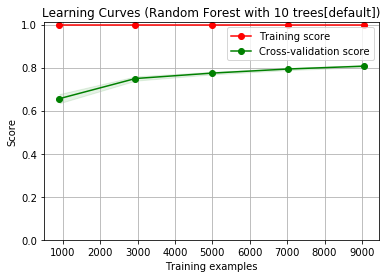

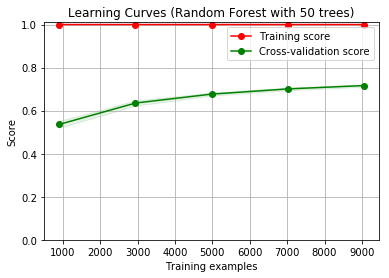

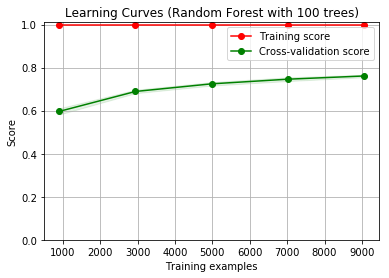

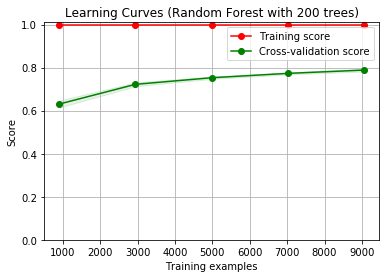

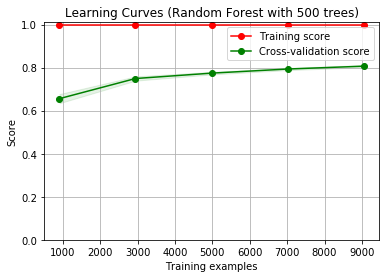

In [61]:
title = "Learning Curves (Random Forest with 10 trees[default])"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=19)
estimator = RandomForestClassifier(random_state=19, n_estimators=500, n_jobs=-1)
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=-1)

title = "Learning Curves (Random Forest with 50 trees)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=19)
estimator = RandomForestClassifier(random_state=19, n_estimators=50, n_jobs=-1)
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=-1)

title = "Learning Curves (Random Forest with 100 trees)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=19)
estimator = RandomForestClassifier(random_state=19, n_estimators=100, n_jobs=-1)
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=-1)

title = "Learning Curves (Random Forest with 200 trees)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=19)
estimator = RandomForestClassifier(random_state=19, n_estimators=200, n_jobs=-1)
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=-1)

title = "Learning Curves (Random Forest with 500 trees)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=19)
estimator = RandomForestClassifier(random_state=19, n_estimators=500, n_jobs=-1)
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=-1)

plt.show()

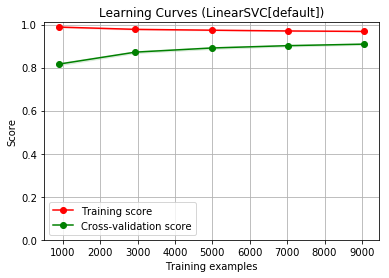

In [60]:
title = "Learning Curves (LinearSVC[default])"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=19)
estimator = LinearSVC()
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=-1)

plt.show()

/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the

Finish CV for: NN[default]


/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the

Finish CV for: NN[512]


/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/sushangjun/Location/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the

Finish CV for: NN[1024]
Finish CV for: NN[2048]


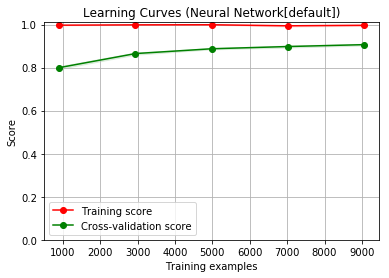

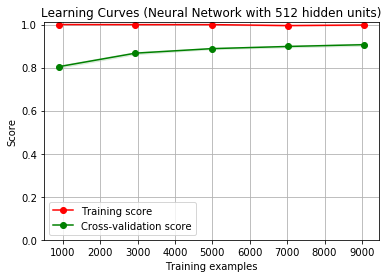

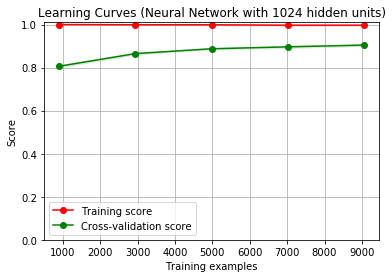

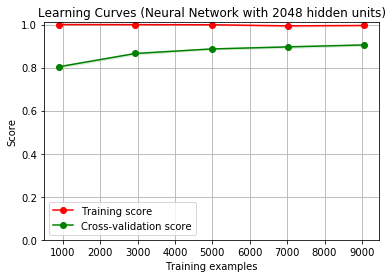

In [78]:
title = "Learning Curves (Neural Network[default])"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=19)
estimator = MLPClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=-1)
print('Finish CV for: NN[default]')

title = "Learning Curves (Neural Network with 512 hidden units)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=19)
estimator = MLPClassifier(hidden_layer_sizes=(512,))
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=-1)
print('Finish CV for: NN[512]')

title = "Learning Curves (Neural Network with 1024 hidden units)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=19)
estimator = MLPClassifier(hidden_layer_sizes=(1024,))
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=-1)
print('Finish CV for: NN[1024]')

title = "Learning Curves (Neural Network with 2048 hidden units)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=19)
estimator = MLPClassifier(hidden_layer_sizes=(2048,))
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=-1)
print('Finish CV for: NN[2048]')

plt.show()